In [81]:
import pandas as pd

# Load the NBA merged data
nba_data = pd.read_csv('nba_merged_data.csv')
# Drop unnecessary columns
nba_data = nba_data.loc[:, ~nba_data.columns.str.contains('_RANK$')]

def categorize_playoff_type(wins):
    if wins == 0:
        return 0
    elif 1 <= wins <= 3:
        return 1
    elif 4 <= wins <= 7:
        return 2
    elif 8 <= wins <= 11:
        return 3
    elif 12 <= wins <= 15:
        return 4
    elif wins == 16:
        return 5

nba_data['PLAYOFF_WINS'] = nba_data['PLAYOFF_WINS'].apply(categorize_playoff_type).apply(pd.Series).astype('category')

# change data type of WL to binary 
nba_data['WL'] = nba_data['WL'].map({'W': 1, 'L': 0})
nba_data['WL'] = nba_data['WL'].astype('category')

# Unnecessary columns for model
columns_to_exclude = [
    'SEASON_YEAR', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME',
    'GAME_ID', 'GAME_DATE', 'MATCHUP', 'MIN',
    'AVAILABLE_FLAG'
]




In [82]:
nba_data.head()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS
0,2024-25,1610612737,ATL,Atlanta Hawks,22401186,2025-04-13T00:00:00,ATL vs. ORL,1,48.0,47,...,0.516,0.162,0.631,0.633,98.5,99.0,82.50,99,0.538,0
1,2024-25,1610612737,ATL,Atlanta Hawks,22401173,2025-04-11T00:00:00,ATL @ PHI,1,48.0,45,...,0.509,0.150,0.564,0.593,103.1,101.0,84.17,100,0.558,0
2,2024-25,1610612737,ATL,Atlanta Hawks,22401169,2025-04-10T00:00:00,ATL @ BKN,1,48.0,48,...,0.530,0.140,0.661,0.675,107.6,107.5,89.58,107,0.650,0
3,2024-25,1610612737,ATL,Atlanta Hawks,22401149,2025-04-08T00:00:00,ATL @ ORL,0,48.0,40,...,0.505,0.186,0.534,0.573,100.2,97.0,80.83,97,0.439,0
4,2024-25,1610612737,ATL,Atlanta Hawks,22401136,2025-04-06T00:00:00,ATL vs. UTA,1,48.0,54,...,0.588,0.118,0.684,0.708,103.6,101.5,84.58,102,0.553,0


In [83]:
# used to print the structure of the dictionary
def print_dict_structure(d, indent=0):
    for key, value in d.items():
        print('  ' * indent + f"{key}: {type(value).__name__}")
        if isinstance(value, dict):
            print_dict_structure(value, indent + 1)

In [84]:
seasons = nba_data['SEASON_YEAR'].unique()
teams = nba_data['TEAM_NAME'].unique()

# Create a dictionary where each season maps to another dictionary with teams as keys and filtered DataFrame as values
seasons_dict = {
    season: {
        team: nba_data[(nba_data['SEASON_YEAR'] == season) & (nba_data['TEAM_NAME'] == team)].drop(columns=columns_to_exclude)
        for team in teams
    }
    for season in seasons
}

print("seasons_dict structure:")
print_dict_structure(seasons_dict)




seasons_dict structure:
2024-25: dict
  Atlanta Hawks: DataFrame
  Boston Celtics: DataFrame
  Brooklyn Nets: DataFrame
  Charlotte Hornets: DataFrame
  Chicago Bulls: DataFrame
  Cleveland Cavaliers: DataFrame
  Dallas Mavericks: DataFrame
  Denver Nuggets: DataFrame
  Detroit Pistons: DataFrame
  Golden State Warriors: DataFrame
  Houston Rockets: DataFrame
  Indiana Pacers: DataFrame
  LA Clippers: DataFrame
  Los Angeles Lakers: DataFrame
  Memphis Grizzlies: DataFrame
  Miami Heat: DataFrame
  Milwaukee Bucks: DataFrame
  Minnesota Timberwolves: DataFrame
  New Orleans Pelicans: DataFrame
  New York Knicks: DataFrame
  Oklahoma City Thunder: DataFrame
  Orlando Magic: DataFrame
  Philadelphia 76ers: DataFrame
  Phoenix Suns: DataFrame
  Portland Trail Blazers: DataFrame
  Sacramento Kings: DataFrame
  San Antonio Spurs: DataFrame
  Toronto Raptors: DataFrame
  Utah Jazz: DataFrame
  Washington Wizards: DataFrame
  Los Angeles Clippers: DataFrame
2023-24: dict
  Atlanta Hawks: Data

In [85]:
seasons_dict['2023-24']['Boston Celtics'].tail()

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS
2619,1,43,90,0.478,15,45,0.333,23,27,0.852,...,0.541,0.110,0.561,0.609,103.2,100.0,83.33,100,0.571,5
2620,1,54,95,0.568,20,35,0.571,27,28,0.964,...,0.633,0.121,0.674,0.722,108.3,107.0,89.17,107,0.682,5
2621,1,51,102,0.500,19,53,0.358,5,7,0.714,...,0.563,0.173,0.593,0.600,105.3,104.0,86.67,104,0.557,5
2622,1,45,95,0.474,16,39,0.410,13,19,0.684,...,0.570,0.150,0.558,0.576,101.2,99.5,82.92,100,0.508,5
2623,1,37,77,0.481,12,39,0.308,22,26,0.846,...,0.458,0.135,0.558,0.611,98.4,96.5,80.42,96,0.592,5


In [86]:
nba_data[(nba_data['SEASON_YEAR'] == '2023-24') & (nba_data['TEAM_NAME'] == 'Atlanta Hawks')].tail()

,SEASON_YEAR,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS
2537,2023-24,1610612737,ATL,Atlanta Hawks,22300117,2023-11-01T00:00:00,ATL vs. WAS,1,48.0,46,...,0.606,0.191,0.549,0.613,112.6,110.5,92.08,110,0.542,0
2538,2023-24,1610612737,ATL,Atlanta Hawks,22300104,2023-10-30T00:00:00,ATL vs. MIN,1,48.0,48,...,0.465,0.113,0.640,0.676,100.8,98.0,81.67,97,0.591,0
2539,2023-24,1610612737,ATL,Atlanta Hawks,22300097,2023-10-29T00:00:00,ATL @ MIL,1,48.0,47,...,0.546,0.163,0.586,0.618,106.2,103.0,85.83,104,0.618,0
2540,2023-24,1610612737,ATL,Atlanta Hawks,22300079,2023-10-27T00:00:00,ATL vs. NYK,0,48.0,42,...,0.490,0.130,0.552,0.599,105.8,107.0,89.17,108,0.495,0
2541,2023-24,1610612737,ATL,Atlanta Hawks,22300063,2023-10-25T00:00:00,ATL @ CHA,0,48.0,39,...,0.452,0.115,0.446,0.512,106.0,104.0,86.67,104,0.451,0


In [87]:
for season, teams_data in seasons_dict.items():
    for team, df in teams_data.items():
        df['GAME_NUMBER'] = range(1, len(df) + 1)

In [88]:
seasons_dict['2023-24']['Atlanta Hawks'].head()

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
2460,0,39,89,0.438,12,36,0.333,25,27,0.926,...,0.159,0.506,0.570,108.6,107.00,89.17,107,0.351,0,1
2461,0,40,90,0.444,9,30,0.300,17,25,0.680,...,0.149,0.494,0.525,102.9,102.00,85.00,101,0.394,0,2
2462,0,43,82,0.524,18,40,0.450,10,16,0.625,...,0.184,0.634,0.640,98.9,98.00,81.67,98,0.495,0,3
2463,0,45,113,0.398,10,46,0.217,11,14,0.786,...,0.145,0.442,0.466,94.5,91.86,76.55,110,0.453,0,4
2464,0,37,87,0.425,12,37,0.324,24,29,0.828,...,0.152,0.494,0.551,105.4,105.00,87.50,105,0.366,0,5


In [89]:
seasons_dict['2023-24']['Atlanta Hawks'].columns

# Sum: WL, FGM, FGA, FG3M, FG3A, FTM, FTA, OREB, DREB, REB, AST, TOV, STL, BLK, BLKA, PF, PFD, PTS
# Dont touch: PLAYOFF_WINS, GAME_NUMBER




Index(['WL', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'BLKA',
       'PF', 'PFD', 'PTS', 'PLUS_MINUS', 'E_OFF_RATING', 'OFF_RATING',
       'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING', 'NET_RATING', 'AST_PCT',
       'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT', 'REB_PCT', 'TM_TOV_PCT',
       'EFG_PCT', 'TS_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE',
       'PLAYOFF_WINS', 'GAME_NUMBER'],
      dtype='object')

In [90]:
import pandas as pd

rolling_aggregations = {}

for season, teams in seasons_dict.items():
    rolling_aggregations[season] = {}
    for team, data in teams.items():
        df = data.copy()
        for column in df.columns:
            if column not in ['PLAYOFF_WINS', 'GAME_NUMBER', 'WL']:
                df[column] = data[column].expanding().mean().round(3)
            elif column == 'WL':
                df[column] = data[column].expanding().sum().round()

        rolling_aggregations[season][team] = df

In [91]:
rolling_aggregations['2023-24']['Atlanta Hawks'].tail(5)


,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
2537,34.0,42.987,92.628,0.465,13.833,38.000,0.365,18.385,23.115,0.792,...,0.134,0.540,0.576,102.528,100.759,83.966,101.615,0.480,0,78
2538,35.0,43.051,92.544,0.466,13.835,37.899,0.366,18.367,23.051,0.794,...,0.133,0.541,0.577,102.506,100.724,83.937,101.557,0.481,0,79
2539,36.0,43.100,92.550,0.467,13.850,37.888,0.366,18.362,23.038,0.794,...,0.134,0.542,0.578,102.553,100.752,83.960,101.588,0.483,0,80
2540,36.0,43.086,92.481,0.467,13.827,37.815,0.367,18.432,23.123,0.794,...,0.134,0.542,0.578,102.593,100.830,84.025,101.667,0.483,0,81
2541,36.0,43.037,92.488,0.466,13.720,37.707,0.364,18.537,23.244,0.794,...,0.133,0.541,0.577,102.634,100.868,84.057,101.695,0.483,0,82


In [92]:
rolling_avg_games_dict = {}

for season, teams in rolling_aggregations.items():
    rolling_avg_games_dict[season] = {}

    total_df = pd.DataFrame()
    
    for team, data in teams.items():
        total_df = pd.concat([total_df, data], ignore_index=True)

    for i in range(1, 83):
        rolling_avg_games_dict[season][f'GAME_{i}'] = (total_df[total_df['GAME_NUMBER'] == i])

print_dict_structure(rolling_avg_games_dict)




2024-25: dict
  GAME_1: DataFrame
  GAME_2: DataFrame
  GAME_3: DataFrame
  GAME_4: DataFrame
  GAME_5: DataFrame
  GAME_6: DataFrame
  GAME_7: DataFrame
  GAME_8: DataFrame
  GAME_9: DataFrame
  GAME_10: DataFrame
  GAME_11: DataFrame
  GAME_12: DataFrame
  GAME_13: DataFrame
  GAME_14: DataFrame
  GAME_15: DataFrame
  GAME_16: DataFrame
  GAME_17: DataFrame
  GAME_18: DataFrame
  GAME_19: DataFrame
  GAME_20: DataFrame
  GAME_21: DataFrame
  GAME_22: DataFrame
  GAME_23: DataFrame
  GAME_24: DataFrame
  GAME_25: DataFrame
  GAME_26: DataFrame
  GAME_27: DataFrame
  GAME_28: DataFrame
  GAME_29: DataFrame
  GAME_30: DataFrame
  GAME_31: DataFrame
  GAME_32: DataFrame
  GAME_33: DataFrame
  GAME_34: DataFrame
  GAME_35: DataFrame
  GAME_36: DataFrame
  GAME_37: DataFrame
  GAME_38: DataFrame
  GAME_39: DataFrame
  GAME_40: DataFrame
  GAME_41: DataFrame
  GAME_42: DataFrame
  GAME_43: DataFrame
  GAME_44: DataFrame
  GAME_45: DataFrame
  GAME_46: DataFrame
  GAME_47: DataFrame
  GAME_4

In [93]:
rolling_avg_games_dict['2023-24']['GAME_1'].head(1)

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
0,0.0,39.0,89.0,0.438,12.0,36.0,0.333,25.0,27.0,0.926,...,0.159,0.506,0.57,108.6,107.0,89.17,107.0,0.351,0,1


In [94]:
rolling_aggregations['2023-24']['Atlanta Hawks'].head(1)

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
2460,0.0,39.0,89.0,0.438,12.0,36.0,0.333,25.0,27.0,0.926,...,0.159,0.506,0.57,108.6,107.0,89.17,107.0,0.351,0,1


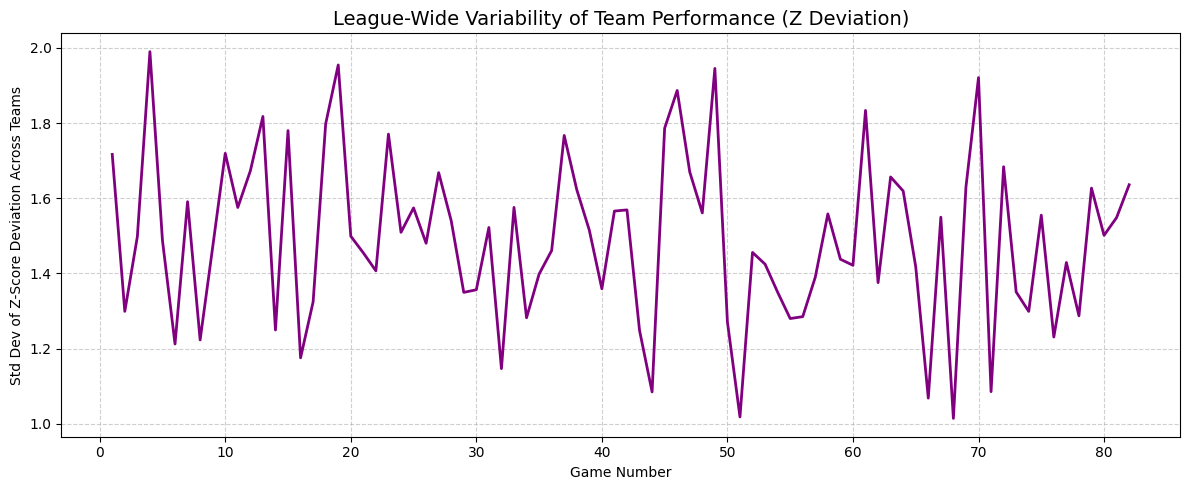

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

season = '2023-24'
teams = list(seasons_dict[season].keys())

# Prepare storage for all team deviations
all_devs = []

# Same stat columns as before
sample_df = seasons_dict[season][teams[0]]
exclude_cols = ['WL', 'PLAYOFF_WINS', 'GAME_NUMBER']
stat_cols = [col for col in sample_df.columns if col not in exclude_cols]

for team in teams:
    df = seasons_dict[season][team].copy()

    # Z-score normalize stats
    mean = df[stat_cols].mean()
    std = df[stat_cols].std(ddof=0)
    df_z = (df[stat_cols] - mean) / std

    # Calculate Euclidean Z deviation
    df['Z_DEV_FROM_AVG'] = np.sqrt((df_z ** 2).sum(axis=1))
    df['TEAM'] = team

    all_devs.append(df[['GAME_NUMBER', 'Z_DEV_FROM_AVG', 'TEAM']])

# Combine all teams into one DataFrame
devs_df = pd.concat(all_devs)

# Group by game number: how much deviation varies across teams
league_var = devs_df.groupby('GAME_NUMBER')['Z_DEV_FROM_AVG'].std()

# Plot league-wide variation over season
plt.figure(figsize=(12, 5))
plt.plot(league_var.index, league_var.values, color='purple', linewidth=2)
plt.title("League-Wide Variability of Team Performance (Z Deviation)", fontsize=14)
plt.xlabel("Game Number")
plt.ylabel("Std Dev of Z-Score Deviation Across Teams")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# Data Analysis

In [48]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical


# split data into x and y
def XYSplit(df):
    x = df.drop(columns=columns_to_exclude)
    y = df['PLAYOFF_WINS']
    return {"x": x, "y": y}

def getModel(input_shape, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(Dense(num_classes, activation='softmax'))  # Output layer with Softmax activation
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use categorical cross-entropy
    return model




In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# split data into x and y
def XYSplit(df):
    x = df.drop(columns=columns_to_exclude)
    y = df['PLAYOFF_WINS']  # Numeric target
    return {"x": x, "y": y}

def getModel(input_shape):
    model = Sequential()
    model.add(Input(shape=(input_shape,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # MSE loss for regression
    return model


In [50]:
list(rolling_avg_games_dict.keys())[1:]

['2023-24',
 '2022-23',
 '2021-22',
 '2020-21',
 '2019-20',
 '2018-19',
 '2017-18',
 '2016-17',
 '2015-16',
 '2014-15']

In [ ]:
# train_years = list(rolling_avg_games_dict.keys())[:-]
# test_year = '2023-24'

# model = getModel(len(rolling_avg_games_dict['2014-15']['GAME_1'].columns) - 1, 6)  # 6 classes for playoff wins
# testing_Accuracy = []


# for train_year in train_years:
#     print(f"Training on {train_year} and testing on {test_year}")
#     train_data = rolling_avg_games_dict[train_year]
#     test_data = rolling_avg_games_dict[test_year]

#     for game, data in train_data.items():
#         print(game)

#         if (data.empty):
#             break

#         x_train = data.drop(columns=['PLAYOFF_WINS'])
#         y_train = data['PLAYOFF_WINS']
#         y_train = pd.get_dummies(y_train)

#         x_test = test_data[game].drop(columns=['PLAYOFF_WINS'])
#         y_test = test_data[game]['PLAYOFF_WINS']
#         y_test = pd.get_dummies(y_test)
        
#         # Train the model

#         model.fit(x_train, y_train, epochs=max(1, int(int(game.split("_")[1]) / 10)), batch_size=30, verbose=1)

#         # Evaluate the model on the testing set
#         test_acc = model.evaluate(x_test, y_test, verbose=0)
#         testing_Accuracy.append(test_acc[1])


Training on 2022-23 and testing on 2023-24
GAME_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step - loss: 22.2676 - mae: 3.6542
GAME_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 143.7960 - mae: 11.1459
GAME_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 19.0729 - mae: 3.2653
GAME_4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 69.6066 - mae: 7.8991
GAME_5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 79.0766 - mae: 8.3829
GAME_6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.4416 - mae: 5.9830
GAME_7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.9597 - mae: 3.6194
GAME_8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 27.4489 - mae: 3.1132
GAME_9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 42.0036 - mae: 4.8818
GAME_10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 41.7489 - mae: 4.9085
GAME_11
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 29.8995 - mae: 3.5386
GAME_12
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 18.8910 - mae: 2.6591
GAME_13
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - los

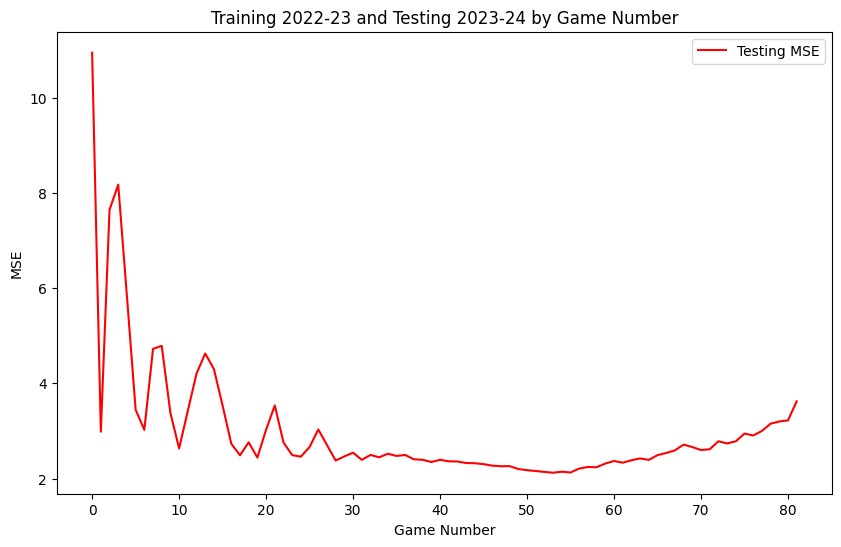

In [82]:
import matplotlib.pyplot as plt

# Plot training and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(testing_mae, label='Testing MSE', color='red')

plt.title('Training 2022-23 and Testing 2023-24 by Game Number')
plt.xlabel('Game Number')
plt.ylabel('MSE')
plt.legend()
plt.grid(False)
plt.show()

In [52]:
rolling_avg_games_dict['2023-24']['GAME_82']

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,TM_TOV_PCT,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER
81,36.0,43.037,92.488,0.466,13.720,37.707,0.364,18.537,23.244,0.794,...,0.133,0.541,0.577,102.634,100.868,84.057,101.695,0.483,0,82
163,64.0,43.915,90.195,0.488,16.476,42.463,0.388,16.268,20.171,0.796,...,0.121,0.579,0.610,99.533,97.994,81.661,98.659,0.554,5,82
245,32.0,40.659,89.110,0.457,13.280,36.707,0.362,15.768,20.866,0.762,...,0.134,0.532,0.562,99.411,97.556,81.297,98.171,0.482,0,82
327,21.0,40.012,86.988,0.461,12.061,34.000,0.353,14.500,18.439,0.789,...,0.140,0.531,0.562,99.460,97.813,81.511,98.134,0.447,0,82
409,39.0,42.049,89.500,0.471,11.476,32.073,0.357,16.695,21.110,0.793,...,0.124,0.536,0.570,98.640,96.940,80.783,98.512,0.493,0,82
491,48.0,41.768,87.159,0.480,13.512,36.780,0.366,15.585,20.378,0.762,...,0.138,0.557,0.587,99.454,97.636,81.364,98.207,0.520,2,82
573,50.0,43.110,89.659,0.481,14.598,39.537,0.367,17.037,22.463,0.753,...,0.124,0.563,0.592,102.409,100.596,83.831,100.768,0.504,4,82
655,57.0,44.024,88.768,0.497,11.683,31.220,0.373,15.122,19.854,0.760,...,0.129,0.563,0.590,99.144,97.436,81.196,97.512,0.530,2,82
737,14.0,40.890,88.244,0.464,11.049,31.732,0.349,17.049,21.707,0.785,...,0.151,0.527,0.563,102.183,100.460,83.716,100.841,0.450,0,82
819,46.0,43.683,91.646,0.478,14.768,38.915,0.379,15.634,20.049,0.777,...,0.142,0.559,0.588,101.733,99.887,83.239,100.744,0.513,0,82


In [20]:
import pandas as pd

train_year = '2023-24'
predict_year = '2024-25'

model = getModel(len(rolling_avg_games_dict['2014-15']['GAME_1'].columns) - 1)

all_predictions = {}

train_data = rolling_avg_games_dict[train_year]
predict_data = rolling_avg_games_dict[predict_year]

for game, data in train_data.items():
    print(f"Training on {train_year} {game}")

    x_train = data.drop(columns=['PLAYOFF_WINS'])
    y_train = data['PLAYOFF_WINS']

    x_predict = predict_data[game]

    x_predict = x_predict.drop(columns=['PLAYOFF_WINS'], errors='ignore')  # in case the column isn't there

    # Train the model
    model.fit(x_train, y_train, epochs=max(1, int(int(game.split("_")[1]) / 10)), batch_size=30, verbose=1)

    # Make predictions on 2024-25
    predictions = model.predict(x_predict, verbose=0)
    all_predictions[game] = predictions.flatten()  # Store 1D array of predictions

# `all_predictions` now holds predictions for each GAME_X


Training on 2023-24 GAME_1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step - loss: 421.5220 - mae: 19.8891
Training on 2023-24 GAME_2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 60.2022 - mae: 7.0478
Training on 2023-24 GAME_3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 45.1414 - mae: 4.8371
Training on 2023-24 GAME_4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 120.2711 - mae: 10.0150
Training on 2023-24 GAME_5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 126.6840 - mae: 10.3420
Training on 2023-24 GAME_6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 87.1681 - mae: 8.3012
Training on 2023-24 GAME_7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 46.3201 - mae: 5.3265
Training on 2023-24 GAME_8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 21.2941 - mae: 2.8284
Training on 2023-24 GAME_9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 19.6543 - mae: 3.8987
Training on 2023-24 GAME_10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 33.5411 - mae: 5.3021
Training on 2023-24 GAME_11
1/1 ━━━━━━━━━━

In [98]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# List of training years
train_years = [
    '2014-15', '2015-16', '2016-17', '2017-18',
    '2018-19', '2019-20', '2020-21', '2021-22', '2022-23'
]

# Aggregate GAME_82 data for each training year
train_df = pd.concat(
    [rolling_avg_games_dict[year]['GAME_82'] for year in train_years],
    ignore_index=True
)

# Test data stays the same
test_year = '2023-24'
test_df = rolling_avg_games_dict[test_year]['GAME_82']


# Targets as categorical labels (int for classification)
y_train = train_df['PLAYOFF_WINS'].astype(int)  # Treat as integers for classification
y_test = test_df['PLAYOFF_WINS'].astype(int)

# Features
x_train = train_df.drop(columns=['PLAYOFF_WINS'])
x_test = test_df.drop(columns=['PLAYOFF_WINS'])

# Create model for multi-class classification
num_classes = y_train.nunique()  # Number of unique categories (e.g., 6 categories)

model = xgb.XGBClassifier(
    objective='multi:softmax',  # Softmax for multi-class classification
    num_class=num_classes,      # Specify the number of classes
    n_estimators=100,
    learning_rate=0.1,
    max_depth=50,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train model
model.fit(x_train, y_train)

# Predict
y_pred = model.predict(x_test)

# Evaluate using accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Classification accuracy on 2023-24: {acc:.3f}")

# Classification report for more detailed evaluation
print("\nClassification report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = model.feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print("\nTop 10 important features:")
print(importance_df.head(10))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:24:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification accuracy on 2023-24: 0.667

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        16
           1       0.57      0.67      0.62         6
           2       0.33      0.75      0.46         4
           3       1.00      0.50      0.67         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.67        30
   macro avg       0.48      0.44      0.43        30
weighted avg       0.76      0.67      0.69        30


Top 10 important features:
         Feature  Importance
0             WL    0.121258
26  E_NET_RATING    0.077294
30     AST_RATIO    0.048791
13           AST    0.044858
3         FG_PCT    0.042614
14           TOV    0.032086
35       EFG_PCT    0.030244
18            PF    0.028444
16           BLK    0.027607
36        TS_PCT    0.025817


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [101]:
y_pred

array([0, 4, 0, 0, 0, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 1, 3, 2, 2, 2, 1,
       2, 2, 0, 1, 0, 0, 0, 0], dtype=int32)

In [93]:
predict_year = '2024-25'

for game, preds in all_predictions.items():
    df = rolling_avg_games_dict[predict_year][game]

    # Ensure lengths match before assigning
    if len(df) == len(preds):
        df = df.copy()  # Avoid SettingWithCopyWarning
        df['PREDICTED_PLAYOFF_WINS'] = preds
        rolling_avg_games_dict[predict_year][game] = df
    else:
        print(f"Skipping {game}: length mismatch between DataFrame and predictions.")


In [96]:
rolling_avg_games_dict['2024-25']['GAME_82']

,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,EFG_PCT,TS_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,PLAYOFF_WINS,GAME_NUMBER,PREDICTED_PLAYOFF_WINS
81,40.0,43.366,91.805,0.474,13.500,37.671,0.357,17.951,23.171,0.774,...,0.548,0.581,105.246,103.407,86.173,103.915,0.498,0,82,-0.027177
163,61.0,41.622,90.024,0.463,17.768,48.232,0.369,15.256,19.085,0.801,...,0.562,0.592,98.339,96.597,80.498,97.305,0.542,0,82,13.498462
245,26.0,37.634,86.098,0.438,13.573,39.415,0.342,16.268,20.683,0.785,...,0.517,0.553,98.991,96.737,80.614,97.195,0.451,0,82,0.386160
327,19.0,38.317,89.122,0.431,12.988,38.329,0.337,15.476,19.768,0.779,...,0.504,0.538,100.317,98.223,81.852,98.524,0.450,0,82,-0.404325
409,39.0,43.207,92.012,0.471,15.439,42.037,0.368,15.951,19.720,0.809,...,0.554,0.586,105.306,103.616,86.347,104.049,0.495,0,82,0.353420
491,64.0,44.537,90.780,0.491,15.890,41.476,0.385,16.976,21.866,0.772,...,0.579,0.609,102.377,100.301,83.584,100.817,0.546,0,82,12.246951
573,39.0,41.988,87.732,0.480,12.439,34.159,0.362,17.780,23.098,0.767,...,0.551,0.584,101.700,100.154,83.462,100.463,0.498,0,82,-0.484269
655,50.0,45.415,89.756,0.507,12.000,31.939,0.377,17.927,23.280,0.771,...,0.575,0.605,102.313,100.680,83.899,101.561,0.528,0,82,2.633250
737,44.0,42.720,89.793,0.477,12.817,35.378,0.362,17.244,22.268,0.769,...,0.549,0.581,102.477,100.284,83.570,100.829,0.511,0,82,1.210786
819,48.0,40.756,90.390,0.452,15.415,42.378,0.363,16.866,22.085,0.758,...,0.537,0.569,101.280,99.384,82.820,99.671,0.515,0,82,4.480152


In [102]:
teams = list(rolling_aggregations['2024-25'].keys())[0:30]
teams

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'LA Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Orleans Pelicans',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Toronto Raptors',
 'Utah Jazz',
 'Washington Wizards']

In [27]:
rolling_avg_games_dict['2024-25']['GAME_82']['PREDICTED_PLAYOFF_WINS'] = predictions



In [103]:
teams = list(rolling_aggregations['2024-25'].keys())[:30]


df = rolling_avg_games_dict['2024-25']['GAME_82']

# Make sure the lengths match before assigning
if len(df) == len(teams):
    df = df.copy()  # avoid SettingWithCopyWarning
    df['TEAM'] = teams
    rolling_avg_games_dict['2024-25']['GAME_82'] = df
else:
    print(f"Length mismatch: {len(df)} rows vs {len(teams)} teams")



In [105]:
rolling_avg_games_dict['2024-25']['GAME_82']["prediction"] = y_pred

rolling_avg_games_dict['2024-25']['GAME_82'][["prediction", "TEAM"]]

,prediction,TEAM
81,0,Atlanta Hawks
163,4,Boston Celtics
245,0,Brooklyn Nets
327,0,Charlotte Hornets
409,0,Chicago Bulls
491,1,Cleveland Cavaliers
573,1,Dallas Mavericks
655,2,Denver Nuggets
737,0,Detroit Pistons
819,2,Golden State Warriors
